# What are your chances of winning the lottery? 

In [ ]:
#generate a random sequence of numbers from 1-99
#generate 100000 more sequences to check to simulate player input
#check if the player inputs equal the entire initial sequence
#check if any numbers in the sequences match one or more numbers in the initial sequence
#calculate the chances of picking all five numbers
#calculate the chances of picking 1 or more numbers in combination
#it is more likely that certain numbers will be selected by users than others. add more weight to "lucky numbers" and include this in the calculations"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [173]:
#alternatively, can use a numpy array to choose the winning numbers
np.random.seed(123)
winning_numbers2 = np.random.randint(0,99,size=(1,6)) #returns a 1 x 5 array of 6 random integers
print('The winning numbers are ' + str(winning_numbers2) + '.')

The winning numbers are [[66 92 98 17 83 57]].


In [192]:
#again, use numpy to generate 1000000 more random sets to simulate players
np.random.seed(123)
bets = np.random.randint(0,99,size=(100,6)) #returns a 100 x 5 array of 6 random integers
print('The player choices are ' + str(bets) + '.')

The player choices are [[66 92 98 17 83 57]
 [86 97 96 47 73 32]
 [46 96 25 83 78 36]
 [96 80 68 49 55 67]
 [ 2 84 39 66 84 47]
 [61 48  7 92 52 97]
 [85 94 27 34 97 76]
 [40  3 69 64 75 34]
 [58 10 22 77 18 15]
 [27 30 52 70 26 80]
 [ 6 14 75 54 71  1]
 [43 58 55 25 50 84]
 [56 49 12 18 81  1]
 [51 44 48 56 91 49]
 [86  3 67 11 21 89]
 [98  3 11  3 94  6]
 [ 9 87 14 83 70 12]
 [54 27 38 17 61 74]
 [65 47 16  5 86 46]
 [15 59 40 25 45 49]
 [ 0 35 29  1 83 68]
 [30  7 93 60 65 76]
 [67 44 51  7 88 70]
 [13 28 63 84 36 96]
 [40 88 63 58 77  8]
 [78  6 65 94 70 40]
 [74 76 76 25  7 13]
 [44  1 41 78 56 87]
 [63 97  3 17 88 87]
 [69 97 50  2 18 46]
 [45 57 35 18 91 46]
 [54 73 81 62 67 11]
 [26 92 75 10  3 45]
 [58 59 23 25 27 57]
 [ 3 78 85 59 48 56]
 [87 87  4 69 56 60]
 [ 9 66 33 69  9 79]
 [28 66 10  3 48  3]
 [23 91 55 34 37 49]
 [87 85 25 17 58 66]
 [45 10  8 96 25 67]
 [65  7 70 97 39 82]
 [92 38  5  9 40 68]
 [87 21 89 50 36 44]
 [92 83 81 61 14 78]
 [23 62 28 80 24 15]
 [49 80 84 

In [166]:
#checks whether any of the sets of bets are equal to the winning numbers
np.equal([winning_numbers2], bets).all(axis=1)

array([[False, False, False, False, False, False]], dtype=bool)

# Womp. You didn't win the lottery. 

So, what were your odds of winning?

There are 100 numbers to be chosen 6 at a time. The total number of possible combinations is kCr, combinations of k objects taken r at a  time. In this case kCr is 100C6, or 100!/(6!94!), and your chance of winning the lottery is 1 in 100C6.

In [188]:
#calculate the number of possible combinations
from scipy.special import comb
k = 100
r = 6
combinations = comb(k, r)
probability6 = 1/combinations
print('There are '+ str(combinations) + ' possible combinations of 100 numbers taken 6 at a time.') 
print('Your chance of winning is '+ str(probability6)+ '.')

There are 1192052400.0 possible combinations of 100 numbers taken 6 at a time.
Your chance of winning is 8.38889297148e-10.


You may still win a lesser amount of money if you choose 3, 4, or 5 of the winning numbers. The number of ways to pick 5 of the 6 winning numbers (or 1 of the 99 non-winning numbers) is (6C5)*(99C1), the number of ways to pick 4 of 6 winning numbers (or 2 of 99 non-winners) is (6C4)*(99C2), etc. 

In [187]:
#calculate the probability of choosing 5 winning numbers
kwin = 6
rwin = 5
klose = 99
rlose = 1
pick5 = (comb(kwin, rwin))*(comb(klose, rlose))
print('There are '+ str(pick5) + ' possible ways to pick 5 of the 6 winning numbers.')

probability5 = pick5/combinations
print('Your chance of winning is '+ str(probability5)+ '.')

There are 594.0 possible ways to pick 5 of the 6 winning numbers.
Your chance of winning is 4.98300242506e-07.


In [186]:
#calculate the probability of choosing 4 winning numbers
kwin = 6
rwin = 4
klose = 99
rlose = 2
pick4 = (comb(kwin, rwin))*(comb(klose, rlose))
print('There are '+ str(pick4) + ' possible ways to pick 4 of the 6 winning numbers.')

probability4 = pick4/combinations
print('Your chance of winning is '+ str(probability4)+ '.')

There are 72765.0 possible ways to pick 4 of the 6 winning numbers.
Your chance of winning is 6.1041779707e-05.


In [185]:
#calculate the probability of choosing 3 winning numbers
kwin = 6
rwin = 3
klose = 99
rlose = 3
pick3 = (comb(kwin, rwin))*(comb(klose, rlose))
print('There are '+ str(pick3) + ' possible ways to pick 3 of the 6 winning numbers.')

probability3 = pick3/combinations
print('Your chance of winning is '+ str(probability3)+ '.')

There are 3136980.0 possible ways to pick 3 of the 6 winning numbers.
Your chance of winning is 0.00263157894737.


Now we can calculate the chance you will win some amount of money. 

In [184]:
#calculate the total probability of winning some amount of money
totalprobability = probability6 + probability5 + probability4 + probability3
completeloser = 1 - totalprobability
print('Your chance of winning something is '+ str(totalprobability)+ ', and your overall odds of winning is the total probability times the number of times you play.')
print('Your chance of winning nothing is '+ str(completeloser)+ '.')

Your chance of winning something is 0.00269311986621, and your overall odds of winning is the total probability times the number of times you play.
Your chance of winning nothing is 0.997306880134.


# Let's have a closer look.

If the numbers are chosen randomly, every number has a roughly equal chance of appearing throughout the array of bets. Take a look at the stem-and-leaf plot of a set of 600 numbers.

In [ ]:
#couldn't figure out how to add the bets array into the stem-and-leaf plot
#made a new 1D numpy array with 600 numbers between 0-100, still didn't work
#np.random.seed(123)
#newbets = np.random.randint(0,100,size=(1, 600)) #returns a 1 x 5 array of 6 random integers
#np.sort(newbets)

In [ ]:
#couldn't figure out how to add the bets array into the stem-and-leaf plot
#made a new list with 600 numbers between 0-100
newbets = []
for x in range(600):
    x = random.randint(0,99) #choose numbers between 0 and 99 
    newbets.append(x)
print(newbets)

In [180]:
#import stemgraphic
#from stemgraphic import *
from IPython.display import Image
path = %pwd

In [ ]:
#build a stem-and-leaf plot of the new bets
fig, ax = stem_graphic(newbets)
stem_graphic(x, aggregation=False, outliers=False, legend_pos=None, delimiter_color = 'k', alpha=0, underline_color='orange')
fig.savefig('newbets.png')

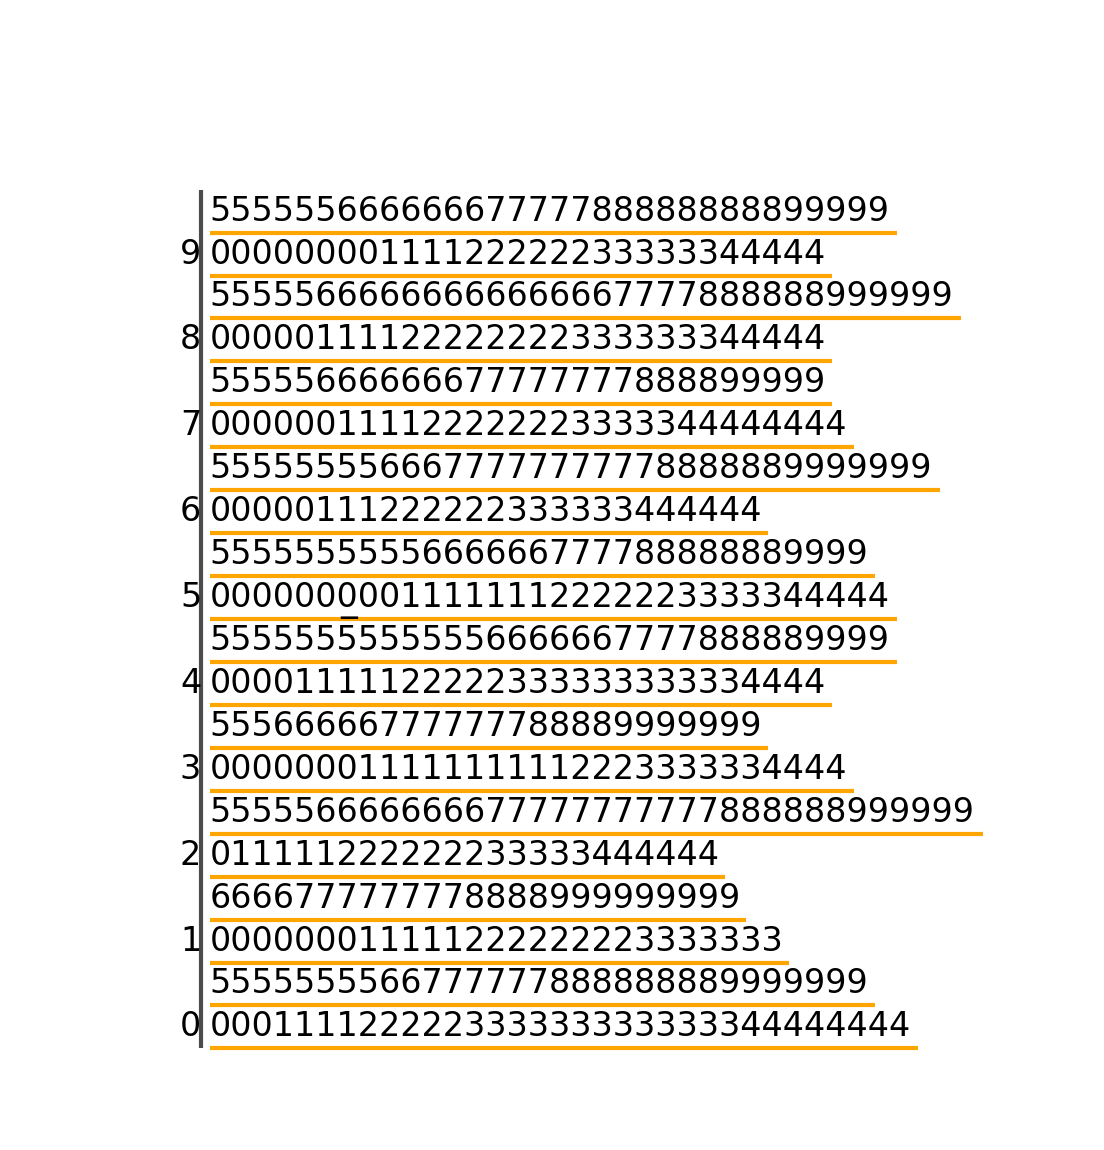

In [190]:
Image(filename = path +'/newbets.png')

However, this is not true in reality. Human beings tend to choose numbers based on holidays, birthdays, other important dates or events, "lucky numbers", etc. Therefore, not all numbers are created equal, and your chances of winning the lottery may not be so simple.